In [47]:
from tifffile import imread
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import sem
import pandas as pd
import seaborn as sns
from rich.progress import track

sns.set(color_codes=True, style="white")
pd.options.mode.chained_assignment = None  # default='warn'

### Load Data

In [48]:
folder = r"Z:\Bisal_Halder_turbo\PROCESSED_DATA\Impact_of_cytoskeleton_on_HOPS_condensates\HOPS_ER_dual imaging\no_drug\Analysed data\After bandpass filtering\All together"
os.chdir(folder)

lst_fname_ER = [f for f in os.listdir(".") if f.endswith("-even-bandpass.tif")]
lst_fname_condensate = [f for f in os.listdir(".") if f.endswith("-odd-bandpass.tif")]

In [49]:
fontsize = 18

### Functions

In [50]:
def weighted_Pearson(video1_flatten, video2_flatten, weights):
    # calculate mean for images and weights
    mean_video1 = np.sum(video1_flatten * weights) / np.sum(weights)
    mean_video2 = np.sum(video2_flatten * weights) / np.sum(weights)
    mean_weights = np.mean(weights)

    # calculate weighted covariance and variances
    cov = np.sum(
        weights * (video1_flatten - mean_video1) * (video2_flatten - mean_video2)
    ) / np.sum(weights)
    var_video1 = np.sum(weights * (video1_flatten - mean_video1) ** 2) / np.sum(weights)
    var_video2 = np.sum(weights * (video2_flatten - mean_video2) ** 2) / np.sum(weights)

    # calculate weighted correlation
    weighted_corr = cov / np.sqrt(var_video1 * var_video2)

    return weighted_corr

### ER-condensate

In [51]:
lst_weighted_corr = []

for fname_ER in track(lst_fname_ER):
    fname_condensate = fname_ER.replace("-even-bandpass.tif", "-odd-bandpass.tif")
    video1 = imread(fname_condensate)
    video2 = imread(fname_ER)
    video1_flatten = video1.flatten()
    video2_flatten = video2.flatten()
    weights = np.ones_like(video1_flatten)
    weighted_corr = weighted_Pearson(video1_flatten, video2_flatten, weights)
    lst_weighted_corr.append(weighted_corr)

Output()

In [52]:
lst_weighted_corr, lst_fname_ER

([0.08727198411146501,
  0.07990682611834116,
  0.04311959685964204,
  0.08854396063270868,
  0.3814155227140921,
  0.08851981703928077,
  0.26521753866115944,
  0.10239900935139062,
  0.09635431341457797,
  0.06953864450077485,
  0.06590020276475773,
  0.09241807167648165,
  0.06182591909306398,
  0.08158068886744436,
  0.17642256527894357,
  0.08815082979392966,
  0.21307967996945976,
  0.11926426871713437,
  0.1404761801853998,
  0.25384459219590666,
  0.1570093753395814,
  0.06052769540424603,
  0.20160253428153285,
  0.13490829155175485,
  0.10053165891407206,
  0.12163717234204775],
 ['20240613_UGD_ER_1x_rep1_FOV-even-bandpass.tif',
  '20240613_UGD_ER_2x_rep1_FOV-1-even-bandpass.tif',
  '20240613_UGD_ER_2x_rep1_FOV-2-even-bandpass.tif',
  '20240613_UGD_ER_2x_rep1_FOV-3-even-bandpass.tif',
  '20240613_UGD_ER_2x_rep1_FOV-even-bandpass.tif',
  '20240627_UGD_ER_2x_rep1_FOV-1-even-bandpass.tif',
  '20240627_UGD_ER_2x_rep1_FOV-2-even-bandpass.tif',
  '20240627_UGD_ER_2x_rep1_FOV-even-b

nan nan


c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\numpy\core\_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\numpy\core\_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
c:\Users\bisal\AppData\Local\miniconda3\envs\spt\lib\site-packages\numpy\core\_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


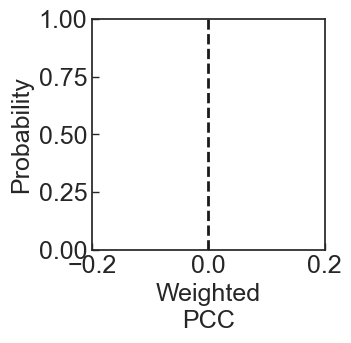

In [37]:
pcc_abs_max = 0.2
plt.figure(figsize=(3, 3))
df = pd.DataFrame({"value": lst_weighted_corr}, dtype=float)
sns.histplot(
    data=df,
    x="value",
    bins=14,
    binrange=(-pcc_abs_max, pcc_abs_max),
    stat="probability",
    lw=2,
    element="step",
    color="gray",
)
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
# plt.xticks([-0.5, 0.5])
# plt.ylim(0, 0.27)
# plt.yticks([0, 0.1, 0.2])
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig(
    "weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight"
)
print(np.mean(lst_weighted_corr), sem(lst_weighted_corr))

0.12967180537612266 0.01533684776386134


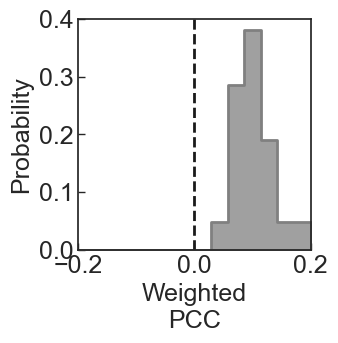

In [53]:
# Plotting the results
pcc_abs_max = 0.2
plt.figure(figsize=(3, 3))
df = pd.DataFrame({"value": lst_weighted_corr})
sns.histplot(data=df, x="value", bins=14, binrange=(-pcc_abs_max, pcc_abs_max), stat="probability", lw=2, element="step", color="gray")
plt.axvline(0, c="k", lw=2, ls="--")
plt.xlim(-pcc_abs_max, pcc_abs_max)
plt.xlabel("Weighted\nPCC", fontsize=fontsize)
plt.ylabel("Probability", fontsize=fontsize)
plt.gca().tick_params(
    axis="both",
    which="major",
    labelsize=fontsize,
    direction="in",
    bottom=True,
    left=True,
    length=5,
    width=1,
)
plt.savefig("weighted_pearson_FlocRloc.png", format="png", dpi=300, bbox_inches="tight")
print(np.mean(lst_weighted_corr), sem(lst_weighted_corr))